In [ ]:
# #Mount your drive
# from google.colab import drive
# drive.mount('/content/drive')

# Code
1.   Implement and apply PCA and LDA to MNIST to find 2 dimensional spaces.
2.   Visualize them by plotting the samples for both algorithms.

In [ ]:
#Code here
# Code here
import six.moves.cPickle as pickle
import gzip
import os
import numpy as np
from PIL import Image
from numpy import linalg as LA
import matplotlib.pyplot as plt
import urllib.request
from numpy.random import uniform
from sklearn.decomposition import PCA

In [ ]:
def load_data(dataset):
    ''' Loads the dataset

    :type dataset: string
    :param dataset: the path to the dataset (here MNIST)

    copied from http://deeplearning.net/ and revised by hchoi
    '''

    # Download the MNIST dataset if it is not present
    if not os.path.isfile(dataset):
        origin = (
            'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
        )
        print('Downloading data from %s' % origin)
        urllib.request.urlretrieve(origin, dataset)

    print('Loading data...')

    # Load the dataset
    with gzip.open(dataset, 'rb') as f:
        try:
            train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
        except:
            train_set, valid_set, test_set = pickle.load(f)
    # train_set, valid_set, test_set format: tuple(input, target)
    # input is a numpy.ndarray of 2 dimensions (a matrix)
    # where each row corresponds to an example. target is a
    # numpy.ndarray of 1 dimension (vector) that has the same length as
    # the number of rows in the input. It should give the target
    # to the example with the same index in the input.
    print('... data has been loaded!')
    return train_set, valid_set, test_set

In [ ]:
#Load the data into train, validation and test sets
train_set, val_set, test_set = load_data('mnist.pkl.gz')

#Separate each set into image vector (_x) and label (_y)
train_x, train_y = train_set
val_x, val_y = val_set
test_x, test_y = test_set

print(train_x.shape)
print(train_y.shape)

Loading data...
... data has been loaded!
(50000, 784)
(50000,)


**PCA**

https://en.wikipedia.org/wiki/Principal_component_analysis

Steps of computing

https://plotly.com/python/pca-visualization/

In [ ]:
def PCA(X, dim):

  #Mean Centering required
  centerX = X - np.mean(X, axis = 0)

  cov = np.cov(centerX.T) #(784, 784)

  eigval, eigvec = np.linalg.eigh(cov)# (784,) (784, 784)

  # Sort is necessary in PCA
  sort = np.argsort(eigval)[::-1]
  eigval = eigval[sort]
  eigvec = eigvec[:,sort]

  reduceEigenvec = eigvec[:, :dim]
  reduceX = centerX.dot(reduceEigenvec)

  return reduceX

In [1]:
PCA_X = PCA (train_x, 2)

print(PCA_X.shape)

plt.scatter(PCA_X[: , 0], PCA_X[: ,1], c=train_y, cmap=plt.cm.get_cmap('tab10', 10), s=10)
plt.colorbar()

plt.show()

NameError: ignored

**LDA**


https://en.wikipedia.org/wiki/Linear_discriminant_analysis

In [ ]:
def LDA(X, y, dim):

    unique_labels = np.unique(y)
    mean_overall = np.mean(X, axis=0)

    S_W = np.zeros((X.shape[1], X.shape[1]))
    S_B = np.zeros((X.shape[1], X.shape[1]))

    for label in unique_labels:

      class_x = X[ y == label ]
      mean_class = np.mean(class_x, axis = 0) #mean of the class

      S_W += (class_x - mean_class).T.dot((class_x - mean_class)) + 1e-4 * np.eye(X.shape[1])

      mean_diff = (mean_class - mean_overall).reshape(X.shape[1], 1)
      S_B += class_x.shape[0] * mean_diff.dot(mean_diff.T)


    eigval, eigvec = np.linalg.eig( (np.linalg.inv(S_W).dot(S_B)) )

    # Sort eigenvalues and eigenvectors

    sort = np.argsort( eigval )[::-1]
    eigval = eigval[sort]
    eigvec = eigvec[:, sort]

    reduceEigenvec = eigvec[:, :dim]
    reduceX = X.dot(reduceEigenvec)

    return reduceX


In [ ]:
LDA_X = LDA(train_x, train_y, 2)

<ipython-input-9-9a34fe2b84c0>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(LDA_X[: , 0], LDA_X[: , 1], c = train_y , cmap=plt.cm.get_cmap('Spectral', 10), s=5)


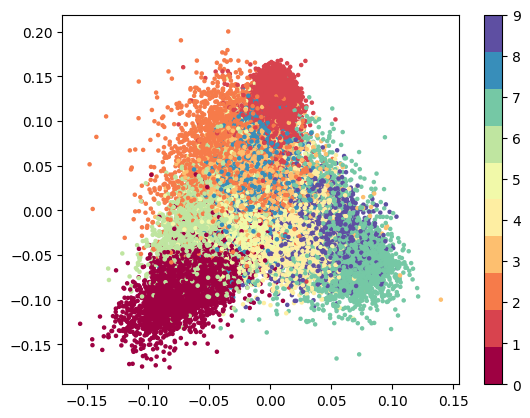

In [ ]:
plt.scatter(LDA_X[: , 0], LDA_X[: , 1], c = train_y , cmap=plt.cm.get_cmap('Spectral', 10), s=5)
plt.colorbar()

plt.show()

# ChatGPT prompts

Now solve the same task with ChatGPT with the following prompts:


1.   Can you implement from scratch (without any specialized libraries) and apply PCA and LDA to the MNIST dataset to find 2 dimensional spaces?
2.   (If not provided automatically in the previous prompt:) Can you plot both PCA and LDA results?


**Paste the answer provided and run the code below:**

In [ ]:
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')
X = mnist.data.astype('float64')
y = mnist.target.astype('int')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


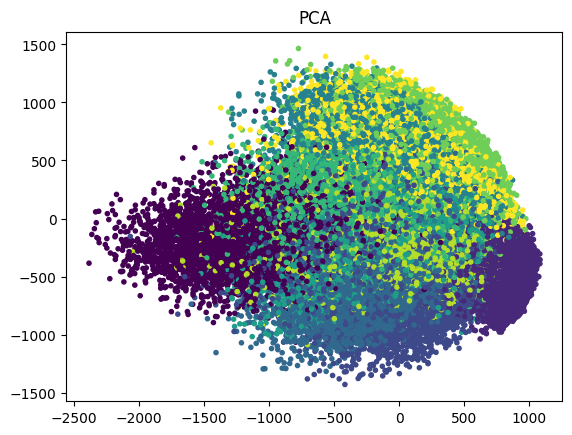

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


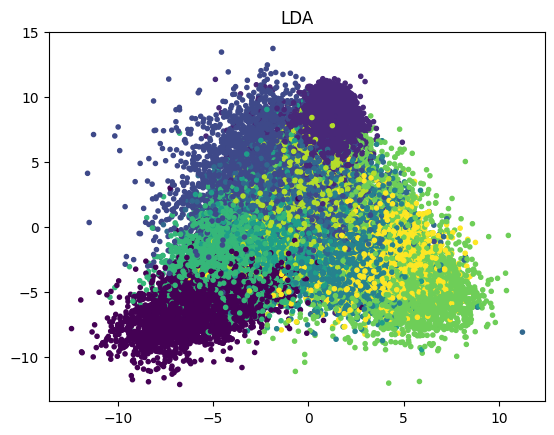

In [ ]:
# Mean center the data
mean = X.mean(axis=0)
X -= mean

import numpy as np

def my_pca(X, num_components=2):
    # Calculate the covariance matrix
    cov_matrix = np.cov(X, rowvar=False)

    # Compute eigenvalues and eigenvectors of the covariance matrix
    eig_values, eig_vectors = np.linalg.eigh(cov_matrix)

    # Sort eigenvalues in descending order and select the top 'num_components'
    sorted_indices = np.argsort(eig_values)[::-1]
    top_indices = sorted_indices[:num_components]

    # Get the corresponding eigenvectors
    top_eigenvectors = eig_vectors[:, top_indices]

    # Project the data onto the selected eigenvectors
    reduced_data = np.dot(X, top_eigenvectors)

    return reduced_data

def my_lda(X, y, num_components=2, regularization=1e-4):
    # Calculate class means
    class_means = []
    for c in np.unique(y):
        class_means.append(np.mean(X[y == c], axis=0))

    class_means = np.array(class_means)

    # Calculate the within-class scatter matrix
    within_class_scatter = np.zeros((X.shape[1], X.shape[1]))
    for c in np.unique(y):
        class_samples = X[y == c]
        class_diff = class_samples - class_means[c]
        within_class_scatter += np.dot(class_diff.T, class_diff)
        within_class_scatter += regularization * np.identity(within_class_scatter.shape[0])

    # Calculate the between-class scatter matrix
    overall_mean = np.mean(X, axis=0)
    between_class_scatter = np.zeros((X.shape[1], X.shape[1]))
    for c in np.unique(y):
        class_samples = X[y == c]
        class_diff = class_means[c] - overall_mean
        between_class_scatter += len(class_samples) * np.outer(class_diff, class_diff)

    # Calculate eigenvalues and eigenvectors
    eig_values, eig_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter).dot(between_class_scatter))

    # Sort eigenvalues in descending order and select the top 'num_components'
    sorted_indices = np.argsort(eig_values)[::-1]
    top_indices = sorted_indices[:num_components]

    # Get the corresponding eigenvectors
    top_eigenvectors = eig_vectors[:, top_indices]

    # Project the data onto the selected eigenvectors
    reduced_data = np.dot(X, top_eigenvectors)

    return reduced_data

# Apply PCA
pca_result = my_pca(X, num_components=2)

# Apply LDA
lda_result = my_lda(X, y, num_components=2)

import matplotlib.pyplot as plt

# Visualize PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y, cmap='viridis', marker='.')
plt.title('PCA')
plt.show()

# Visualize LDA results
plt.scatter(lda_result[:, 0], lda_result[:, 1], c=y, cmap='viridis', marker='.')
plt.title('LDA')
plt.show()


##Report


1.   What are some differences you notice between your code and ChatGPT's? (Name at least 3)
2.   Ask ChatGPT to compare the differences between PCA and LDA. Paste the answer here. Do you agree with ChatGPT's statement? Why yes or why not?
4.   Conclude with some thoughts and things you learned from this homework.

Machine Learning HW 6
21900628
Sechang Jang
**What are some differences you notice between your code and ChatGPT's? (Name at least 3)**
1.	Using Dataset is different. I am using the MNIST dataset from 'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'. However, ChatGPT extracts the MNIST dataset of ‘mnist_784’. Also, I used only data and labels of train set, which has 50000 elements, but ChatGPT’s code uses whole data and labels from the dataset.
2.	For the whole data (X) value, I only extract the center X value for PCA (subtracting the mean of X), but ChatGPT’s code subtracted (centered) X for both PCA and LDA calculation. Therefore, the tendency of the plot in LDA is different from my LDA calculation result as well as projecting with different data sets.
3.	The whole process of LDA in ChatGPT’s code is well organized. It uses some unnecessary loops, but it is easy to see what specific portion of the code is doing what. For example, it splits the code to calculate the SW and SB using the specific term. However, my code tried to calculate the whole process within one process. Also, it uses more specific NumPy methods.  
4.	LDA for the MNIST dataset requires regularization if it deals with the data(X) itself, not the reduced one. The method of regularization is not that different, but both code invokes different method.

**Ask ChatGPT to compare the differences between PCA and LDA. Paste the answer here. Do you agree with ChatGPT's statement? Why yes or why not?**

PCA (Principal Component Analysis) and LDA (Linear Discriminant Analysis) are both dimensionality reduction techniques, but they serve different purposes and have distinct characteristics. Here's a comparison of the differences between PCA and LDA:

    Objective:
        PCA: PCA is primarily used for reducing the dimensionality of the data while preserving as much variance as possible. It finds a new set of orthogonal axes (principal components) that maximize the variance in the data.
        LDA: LDA is used for dimensionality reduction and classification. Its main objective is to find a lower-dimensional space where the classes are well-separated. It aims to maximize the inter-class variance and minimize the intra-class variance.
    Supervision:
        PCA: PCA is an unsupervised technique, meaning it doesn't consider class labels. It focuses on the overall variance in the data.
        LDA: LDA is a supervised technique. It uses class labels to find a projection that maximizes class separability.
    Use Cases:
        PCA: PCA is commonly used for data compression, noise reduction, and visualization. It's beneficial when you want to reduce the dimensionality of data for visualization or to speed up machine learning algorithms.
        LDA: LDA is primarily used for feature extraction in classification tasks. It's helpful when you want to improve the performance of a classifier by reducing the dimensionality and enhancing class separability.
    Dimensionality Reduction:
        PCA: PCA reduces dimensionality by creating a new set of orthogonal axes (principal components). You can choose to keep as many components as you want, depending on the amount of variance you want to retain.
        LDA: LDA also reduces dimensionality, but it typically reduces it to a number of dimensions equal to the number of classes minus one. It creates a subspace that maximizes class separability.
    Orthogonality:
        PCA: Principal components are orthogonal to each other. They capture the most significant directions of variance in the data.
        LDA: Linear discriminants are not necessarily orthogonal. Their primary concern is class separation, so they are oriented to maximize the separability between classes.
    Data Assumptions:
        PCA: PCA assumes that the data is Gaussian and that the maximum variance captures the essential information in the dataset.
        LDA: LDA assumes that the classes have approximately equal covariance matrices and that they are normally distributed. It also assumes that the classes are linearly separable.
    Use with Classification:
        PCA: PCA doesn't consider class labels, so it may not directly improve classification performance.
        LDA: LDA is explicitly designed to enhance classification performance by creating features that maximize class separation.
In summary,PCA and LDA have distinct purposes and characteristics. PCA is used for unsupervised dimensionality reduction and focuses on preserving data variance, while LDA is a supervised technique that aims to maximize class separation for classification tasks. The choice between PCA and LDA depends on your specific goals and the nature of your data.

**My answer**: I generally agree with ChatGPT’s statement. PCA and LDA are different in many aspects. The objective is different. PCA is to reduce the dimensions, and LDA also reduces the dimensions, but LDA’s another objective is to classify the dataset. PCA does not require labels, but LDA requires labels. Also, the assumptions of the dataset must be different.

However, the difference is also in the calculation process. LDA considers scatteredness within and between the class (since it mainly focuses on classification). PCA mainly focuses on keeping the information in reducing the dimensionality, so PCA aims to maximize the variance in the reduction. LDA tries to find the best projection that separates the classes.
https://medium.com/@seshu8hachi/pca-vs-lda-no-more-confusion-fc21fb8d06e9

**Conclude with some thoughts and things you learned from this homework.**


Reducing the dimensionality of the data and keeping the important features is necessary to increase the efficiency of calculation in huge datasets. PCA and LDA is an important technique to do so. Real data must have many features and dimensions and usage of PCA will be necessary.

It was interesting to see how LDA classified the original dataset. The original dataset has numbers that can be confused, so the PCA plot shows entanglement plots within specific numbers. In LDA, it still shows a similar tendency little, but many data separated well.
